<a href="https://colab.research.google.com/github/vihaveman/Breaking_Barriers/blob/Jibek/Breaking_barriers_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# import hvplot.pandas
import numpy as np

In [16]:
import pandas as pd
# Replace the file path with the correct location of the CSV file on your system
file_path = "/content/World_Bank.csv"
# Read the CSV file into a Pandas DataFrame and set the index to "Country Name"
df_technology_raw = pd.read_csv(file_path, index_col='Country Name')
# Review the DataFrame by displaying a random sample of 10 rows
df_technology_raw.sample(10)


,Country Code,Year,ATM Usage,GDP,High Tech Export ($M),High Tech Import,Internet Subscription Per 100,Internet Usage Per 100,IP Income($M),Labour Force (M),Med_High Tech Manufacturing,Mobile Sub Per 100,Personal Remittance ($M),Poverty Count,Stock Traded $B,Tech Cooperation Grant($M),Unemployment Rate,Med High Tech Export
Country Name,,,,,,,,,,,,,,,,,,
Cuba,CUB,2013,40.06,2.64,1867.01,34.78,0.05,27.93,107.57,5.21,16.22,17.63,1666.91,1.00,0.07,20.27,3.46,63.43
Singapore,SGP,2014,58.21,2.59,144926.28,48.75,26.46,82.10,23105.59,3.24,75.88,145.48,0.00,10.54,90.62,150.97,3.86,66.48
Zambia,ZMB,2003,NaN,3.69,NaN,20.59,0.00,0.98,0.40,3.23,6.08,2.22,268.16,2.40,0.12,116.30,14.13,4.67
Cameroon,CMR,2021,5.04,0.95,314116.57,31.02,2.13,45.60,1.95,10.82,4.83,79.97,334.10,6.45,1.13,144.16,3.95,56.32
Oman,OMN,2010,54.24,-4.79,801117.82,40.43,1.93,35.83,103815.89,1.13,19.38,151.45,39.01,9.00,12.06,2.40,4.06,42.71
Albania,ALB,2017,34.08,3.90,1.12,10.66,10.54,62.40,24.58,1.35,4.88,125.92,1306.01,0.40,NaN,75.60,15.42,3.56
New Zealand,NZL,2016,69.07,1.50,640.08,35.82,32.79,86.50,942.76,2.54,19.72,130.67,531.74,0.75,5.09,66.03,5.41,18.80
French Polynesia,PYF,2003,NaN,0.56,NaN,37.33,0.36,14.12,44347.49,0.10,15.94,22.84,407.98,4.19,63.60,303.96,11.71,15.43
Argentina,ARG,2020,60.75,-10.81,546.45,31.71,21.25,85.51,2054.24,20.61,25.26,121.60,561.40,1.10,0.67,42.80,9.84,36.38


In [17]:
df_technology = df_technology_raw.drop(columns=['Country Code', 'Year'])

In [18]:
df_technology.shape
df_technology.columns

Index(['ATM Usage', 'GDP', 'High Tech Export ($M)', 'High Tech Import',
       'Internet Subscription Per 100', 'Internet Usage Per 100',
       'IP Income($M)', 'Labour Force (M)', 'Med_High Tech Manufacturing',
       'Mobile Sub Per 100', 'Personal Remittance ($M)', 'Poverty Count',
       'Stock Traded $B', 'Tech Cooperation Grant($M)', 'Unemployment Rate',
       'Med High Tech Export'],
      dtype='object')

Part 1: Scale the DataFrame and create a new DataFrame that contains the scaled data.

In [19]:
data_scaled = StandardScaler().fit_transform(
    df_technology[['ATM Usage', 'GDP', 'High Tech Export ($M)', 'High Tech Import',
       'Internet Subscription Per 100', 'Internet Usage Per 100',
       'IP Income($M)', 'Labour Force (M)', 'Med_High Tech Manufacturing',
       'Mobile Sub Per 100', 'Personal Remittance ($M)', 'Poverty Count',
       'Stock Traded $B', 'Tech Cooperation Grant($M)', 'Unemployment Rate',
       'Med High Tech Export']]
)

In [24]:
# Create a DataFrame with the scaled data
df_technology_scaled = pd.DataFrame(
    data_scaled,
    columns=['ATM Usage', 'GDP', 'High Tech Export ($M)', 'High Tech Import',
       'Internet Subscription Per 100', 'Internet Usage Per 100',
       'IP Income($M)', 'Labour Force (M)', 'Med_High Tech Manufacturing',
       'Mobile Sub Per 100', 'Personal Remittance ($M)', 'Poverty Count',
       'Stock Traded $B', 'Tech Cooperation Grant($M)', 'Unemployment Rate',
       'Med High Tech Export']
)
# Copy the tickers names from the original data
df_technology_scaled["Countries"] = df_technology.index
# Set the Ticker column as index
df_technology_scaled = df_technology_scaled.set_index("Countries")
# Display sample data

# Assuming df_technology_scaled is your DataFrame with missing values
# Replace NaN values with column averages
df_technology_scaled_filled = df_technology_scaled.fillna(df_technology_scaled.mean())
df_technology_scaled_filled.sample(10)

,ATM Usage,GDP,High Tech Export ($M),High Tech Import,Internet Subscription Per 100,Internet Usage Per 100,IP Income($M),Labour Force (M),Med_High Tech Manufacturing,Mobile Sub Per 100,Personal Remittance ($M),Poverty Count,Stock Traded $B,Tech Cooperation Grant($M),Unemployment Rate,Med High Tech Export
Countries,,,,,,,,,,,,,,,,
Zimbabwe,8.322609e-17,-1.176977,4.763035e-17,-1.624895,-0.783296,-1.182132,-0.262034,-0.317775,-0.831341,-1.402116,-0.304874,1.966975,-0.578873,-0.088653,-0.360664,0.045916
Euro area,1.011230e+00,-0.508058,1.834379e+00,0.927730,1.840007,1.283354,2.908098,0.073869,-0.555213,0.852931,1.046231,-0.623935,-0.162665,-0.082086,0.624831,-0.403323
United Kingdom,2.060544e+00,0.070258,-6.523521e-02,0.547136,2.288543,1.798740,0.039675,-0.246797,1.502956,0.820401,-0.223805,-0.679615,0.116510,-0.104215,-0.076423,1.810889
Thailand,1.662512e+00,-0.147574,-3.706398e-01,0.155390,0.671300,1.591540,-0.110510,-0.229065,0.389686,1.711240,-0.161574,-0.694077,0.554848,-0.095021,-1.276969,-1.131552
Pre-demographic dividend,-9.956530e-01,0.220621,4.763035e-17,0.468369,-0.300387,-1.116769,-0.259365,0.250942,0.544588,-1.160945,0.031272,-0.654306,-0.481235,-0.072963,-0.603766,1.067406
Turks and Caicos Islands,8.322609e-17,2.678465,4.763035e-17,-0.780758,-0.743054,-1.118730,-0.189451,-0.318494,0.181580,0.606525,-0.172519,-0.636228,-0.414968,-0.156188,-0.444815,-0.573079
Burundi,-1.008554e+00,-0.454082,-3.136842e-01,-0.798185,0.297381,-1.172327,-0.247078,-0.320478,-1.251595,-1.380616,-0.310405,-0.674553,-0.245955,-0.117047,-0.888007,1.134324
El Salvador,-2.122517e-01,-0.004923,-3.698076e-01,-0.840008,-0.307932,-0.319342,-0.259999,-0.322288,-0.209715,1.356400,-0.235415,-0.527761,-0.018578,-0.126600,-0.706616,-0.851578
Gabon,-7.662949e-01,-0.097453,-3.565676e-02,0.358931,-0.760660,-0.410850,-0.055624,-0.327447,-1.135083,1.159349,-0.310013,-0.681061,0.564576,-0.140196,2.335890,-1.019858


Part 2. Use the Elbow Method to determine the optimal number of clusters for KMeans.

In [21]:
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch

In [22]:
# Create a list to store inertia values and the values of k
inertia = []
# Create a list to set the range of k values to test
k = list(range(1, 11))

In [25]:
# Create a for loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the "customers_df" DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(df_technology_scaled_filled)
    inertia.append(k_model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [26]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,93331.000000
1,2,78251.742190
2,3,67027.649806
3,4,63117.218539
4,5,57949.583539


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

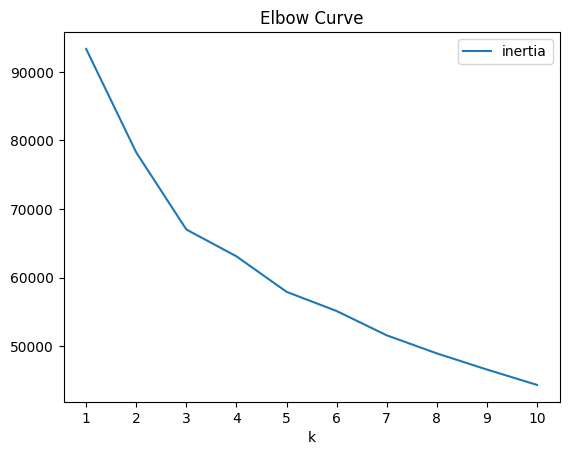

In [27]:
# Plot the DataFrame to identify the optimal value for k
df_elbow.plot.line(
    x="k",
    y="inertia",
    title="Elbow Curve",
    xticks=k
)


Part 3: Segment the data with K-means using the optimal number of clusters

In [28]:
# Define the model with optimal number of clusters
model = KMeans(n_clusters=5, random_state=0)
# Fit the model
model.fit(df_technology_scaled_filled)
# Make predictions
kmeans_predictions = model.predict(df_technology_scaled_filled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [29]:
kmeans_predictions[-10:]

array([3, 3, 2, 3, 3, 3, 0, 3, 3, 3], dtype=int32)

Part 4. Cluster the data using AgglomerativeClustering and Birch

In [31]:
agglo_model = AgglomerativeClustering(n_clusters=5)
agglo_predictions = agglo_model.fit_predict(df_technology_scaled_filled)

In [32]:
agglo_predictions[-10:]

array([0, 0, 0, 0, 0, 0, 2, 0, 0, 0])

In [33]:
birch_model = Birch(n_clusters=5)
birch_model.fit(df_technology_scaled_filled)
birch_predictions = birch_model.predict(df_technology_scaled_filled)

In [34]:
# Previewing the predicted customer classifcations for Birch
birch_predictions[-10:]

array([4, 4, 4, 4, 4, 4, 1, 4, 4, 4])

Part 5. Compare the cluster results from using Kmeans, AgglomerativeClustering, Birch

In [35]:
# Create a copy of the customers_df DataFrame
technology_predictions_df = df_technology_scaled_filled.copy()
# Add class columns with the labels to the new DataFrame
technology_predictions_df["kmeans-segments"] = kmeans_predictions
technology_predictions_df["agglomerative-segments"] = agglo_predictions
technology_predictions_df["birch-segments"] = birch_predictions
technology_predictions_df[['kmeans-segments','agglomerative-segments', 'birch-segments']].head(3)

,kmeans-segments,agglomerative-segments,birch-segments
Countries,,,
Afghanistan,1,4,0
Africa Eastern and Southern,1,4,0
Africa Western and Central,1,4,0


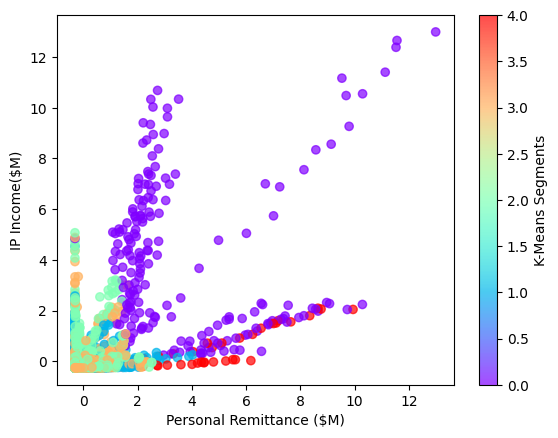

In [36]:
# Plot the kmeans clusters using the "feature_1" and "feature_2" columns
import matplotlib.pyplot as plt
plt.scatter(
    x=technology_predictions_df["Personal Remittance ($M)"],
    y=technology_predictions_df["IP Income($M)"],
    c=technology_predictions_df["kmeans-segments"],
    cmap='rainbow',  # Colormap for cluster colors
    alpha=0.7,      # Adjust transparency (optional)
)

# Add axis labels and a colorbar
plt.xlabel("Personal Remittance ($M)")
plt.ylabel("IP Income($M)")
plt.colorbar(label="K-Means Segments")

# Show the plot
plt.show()

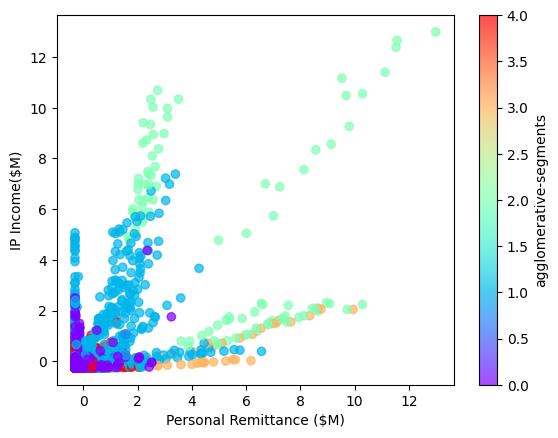

In [37]:
# Plot the kmeans clusters using the "feature_1" and "feature_2" columns
plt.scatter(
    x=technology_predictions_df["Personal Remittance ($M)"],
    y=technology_predictions_df["IP Income($M)"],
    c=technology_predictions_df["agglomerative-segments"],
    cmap='rainbow',  # Colormap for cluster colors
    alpha=0.7,      # Adjust transparency (optional)
)

# Add axis labels and a colorbar
plt.xlabel("Personal Remittance ($M)")
plt.ylabel("IP Income($M)")
plt.colorbar(label="agglomerative-segments")

# Show the plot
plt.show()

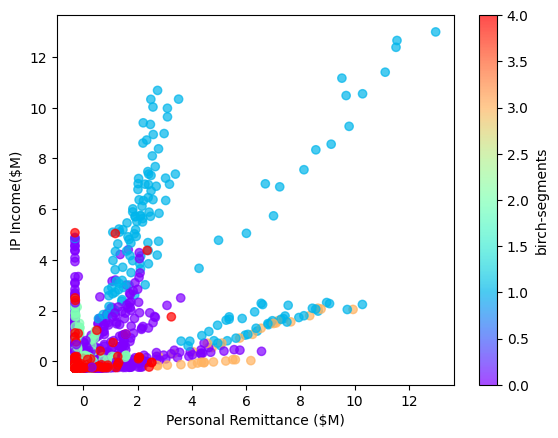

In [38]:
# Plot the birch clusters using the "feature_1" and "feature_2" columns
# Plot the kmeans clusters using the "feature_1" and "feature_2" columns
plt.scatter(
    x=technology_predictions_df["Personal Remittance ($M)"],
    y=technology_predictions_df["IP Income($M)"],
    c=technology_predictions_df["birch-segments"],
    cmap='rainbow',  # Colormap for cluster colors
    alpha=0.7,      # Adjust transparency (optional)
)

# Add axis labels and a colorbar
plt.xlabel("Personal Remittance ($M)")
plt.ylabel("IP Income($M)")
plt.colorbar(label="birch-segments")

# Show the plot
plt.show()

In [39]:
technology_predictions_df[['kmeans-segments','agglomerative-segments', 'birch-segments']].corr()

,kmeans-segments,agglomerative-segments,birch-segments
kmeans-segments,1.000000,-0.205075,0.177699
agglomerative-segments,-0.205075,1.000000,-0.660254
birch-segments,0.177699,-0.660254,1.000000


Part 6: Reduce the number of features to two principal components on the df_stocks_scaled DataFrame, and calculate the explained variance ratio that results from the PCA data.

In [44]:
# Create the PCA model instance where n_components=2
pca = PCA(n_components=5)

In [45]:
# Fit the df_stocks_scaled data to the PCA
tech_pca_data = pca.fit_transform(df_technology_scaled_filled)

# Review the first five rose of the PCA data
# using bracket notation ([0:5])
tech_pca_data[:5]

array([[-1.74001084,  0.15993729,  0.5960481 , -0.14613969, -0.77031344],
       [-1.19416236,  0.17219821, -0.65346505, -0.12044175, -0.3988078 ],
       [-1.72685925,  0.35440907,  0.61683314, -0.08069865, -0.82303625],
       [-2.21567802,  0.15466849,  0.83151211, -0.63966116, -0.36363112],
       [-2.48245607,  0.06892052,  1.13456885, -0.23812594, -1.08509291]])

In [46]:
# Calculate the explained variance
pca.explained_variance_ratio_

array([0.22687095, 0.17622049, 0.08773979, 0.06864949, 0.06694365])

In [48]:
import numpy as np
# Fit the PCA model to your data
pca.fit(df_technology_scaled_filled)
# Get the loadings (coefficients) for each feature
loadings = pca.components_
# Determine the absolute magnitude of the loadings
absolute_loadings = np.abs(loadings)
# Find the most important feature for each component
most_important_features = np.argmax(absolute_loadings, axis=1)
# Print the most important features for each component
for component, feature_idx in enumerate(most_important_features):
    feature_name = df_technology_scaled.columns[feature_idx]
    print(f"Component {component+1}: Most important feature is {feature_name}")

Component 1: Most important feature is Internet Usage Per 100
Component 2: Most important feature is Personal Remittance ($M)
Component 3: Most important feature is Med High Tech Export
Component 4: Most important feature is Tech Cooperation Grant($M)
Component 5: Most important feature is GDP


Part 7: Use the calculate PCA DataFrame in Step 6 to create a new DataFrame called, then add an additional column to the DataFrame that contains the tickers from the originalDataFrame.

In [49]:
# Creating a DataFrame with the PCA data
df_technology_pca = pd.DataFrame(tech_pca_data, columns=["PC1", "PC2","PC3","PC4","PC5"])
# Copy the tickers names from the original data
df_technology_pca["Countries"] = df_technology.index
# Set the Ticker column as index
df_technology_pca = df_technology_pca.set_index("Countries")
# Review the DataFrame
df_technology_pca.head()

,PC1,PC2,PC3,PC4,PC5
Countries,,,,,
Afghanistan,-1.740011,0.159937,0.596048,-0.146140,-0.770313
Africa Eastern and Southern,-1.194162,0.172198,-0.653465,-0.120442,-0.398808
Africa Western and Central,-1.726859,0.354409,0.616833,-0.080699,-0.823036
Albania,-2.215678,0.154668,0.831512,-0.639661,-0.363631
Algeria,-2.482456,0.068921,1.134569,-0.238126,-1.085093


Part 8: Two principal components for the x- and y-axes. Be sure to style and format your plot.

In [50]:
# Initialize the K-Means model with n_clusters=3
model = KMeans(n_clusters=5)
# Fit the model for the df_stocks_pca DataFrame
model.fit(df_technology_pca)
# Predict the model segments (clusters)
tech_clusters = model.predict(df_technology_pca)
# Print the stock segments
print(tech_clusters)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 0 ... 3 3 3]


In [59]:
# Create a copy of the DataFrame and name it as df_stocks_pca_predictions
df_tech_pca_predictions = df_technology_pca.copy()
# Create a new column in the DataFrame with the predicted clusters
df_tech_pca_predictions["TechCluster"] = tech_clusters
# Review the DataFrame
df_tech_pca_predictions.head(50)

,PC1,PC2,PC3,PC4,PC5,TechCluster
Countries,,,,,,
Afghanistan,-1.740011,0.159937,0.596048,-0.146140,-0.770313,0
Africa Eastern and Southern,-1.194162,0.172198,-0.653465,-0.120442,-0.398808,0
Africa Western and Central,-1.726859,0.354409,0.616833,-0.080699,-0.823036,0
Albania,-2.215678,0.154668,0.831512,-0.639661,-0.363631,0
Algeria,-2.482456,0.068921,1.134569,-0.238126,-1.085093,0
American Samoa,-1.651490,0.046958,-0.265798,-0.465352,0.211357,0
Andorra,-1.530511,-0.006142,0.735838,-0.127456,-0.395032,0
Angola,-1.638591,0.368874,0.268846,-0.047763,-2.280173,0
Antigua and Barbuda,-1.097857,-0.109433,-0.532095,-0.358203,-0.000017,0


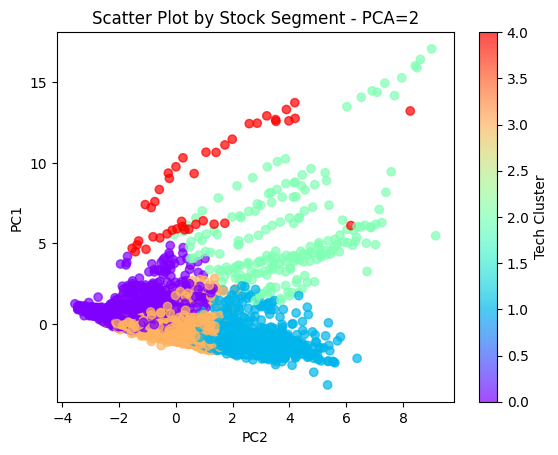

In [52]:
# Create the scatter plot with x="PC1" and y="PC2"
# Create a scatter plot with different colors for each cluster
plt.scatter(
    x=df_tech_pca_predictions["PC1"],
    y=df_tech_pca_predictions["PC2"],
    c=df_tech_pca_predictions["TechCluster"],
    cmap='rainbow',  # Colormap for cluster colors
    alpha=0.7,      # Adjust transparency (optional)
)

# Add axis labels and a colorbar
plt.xlabel("PC2")
plt.ylabel("PC1")
plt.colorbar(label="Tech Cluster")

# Add the title
plt.title("Scatter Plot by Stock Segment - PCA=2")

# Show the plot
plt.show()

In [61]:
df_tech_pca_predictions.head(50).to_csv('tech_data.csv', index=True)
df_tech_pca_predictions.head()

,PC1,PC2,PC3,PC4,PC5,TechCluster
Countries,,,,,,
Afghanistan,-1.740011,0.159937,0.596048,-0.146140,-0.770313,0
Africa Eastern and Southern,-1.194162,0.172198,-0.653465,-0.120442,-0.398808,0
Africa Western and Central,-1.726859,0.354409,0.616833,-0.080699,-0.823036,0
Albania,-2.215678,0.154668,0.831512,-0.639661,-0.363631,0
Algeria,-2.482456,0.068921,1.134569,-0.238126,-1.085093,0
